<a href="https://colab.research.google.com/github/martinacaramaschi/TPT-PE-thematic-analysis/blob/main/17_TPT_PE_article_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17 Figures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

directory_name = '/content/drive/MyDrive/Colab Notebooks/TPT_PE_review/'
file_path = directory_name + 'matrix_paper_weights_comb_k20_928.pkl'
df = pd.read_pickle(file_path)

df.head()

,year,title,authors,doi,journal,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,1978,The universe: Open or closed?,Belserene EP,1.2339852,TPT,0.000000,0.021419,0.429143,0.019236,0.031187,...,0.124490,0.000000,0.000000,0.000000,0.000000,0.00000,0.014093,0.000000,0.000000,0.000000
1,1984,The systems approach in electronics teaching,M Geddes,10.1088/0031-9120/19/6/001,PE,0.000000,0.000000,0.000000,0.000000,0.032033,...,0.011915,0.000000,0.000000,0.000000,0.010371,0.00000,0.000000,0.545758,0.366987,0.019086
2,2012,Changes Coming to the International System of ...,Aubrecht GJ,1.4745684,TPT,0.037825,0.000000,0.213554,0.000000,0.107461,...,0.073153,0.022725,0.000000,0.063774,0.000000,0.00000,0.336968,0.064562,0.020606,0.012713
3,1991,Teaching E=mc2: An exploration of some issues,Baierlein R,1.2343265,TPT,0.038157,0.000000,0.177119,0.014844,0.141694,...,0.016761,0.000000,0.000000,0.018955,0.025073,0.00000,0.338144,0.000000,0.000000,0.000000
4,2019,The sounds of war: ‘phonotelemetry’ at the Ita...,"Colombi, Guerra, Leone, Robotti",10.1088/1361-6552/ab0907,PE,0.000000,0.018433,0.000000,0.000000,0.497209,...,0.016392,0.000000,0.064869,0.158153,0.083526,0.02997,0.000000,0.073796,0.000000,0.000000


In [ ]:
topic_ind_table1 = [4] #Hist and philo
topic_ind_table2 = [2, 6, 5, 9, 12, 19, 1, 8, 15, 18, 0, 7, 11, 16] #content
topic_ind_table3 = [17, 10, 3, 13] #teaching
topic_ind_table4 = [14] #learning PER

topic_ind = topic_ind_table2 + topic_ind_table1 + topic_ind_table3 + topic_ind_table4
topic_ind_short = topic_ind_table1 + topic_ind_table3 + topic_ind_table4

In [ ]:
topic_keys = ['Topic 11: Thermodynamics',
              'Topic 7: Optics',
              'Topic 1: Math & equations',
              'Topic 18: Demonstrations',
              'Topic 15: HPP',
              'Topic 3: Applied mech.',
              'Topic 2: Newtonian mech.',
              'Topic 12: Astronomy',
              'Topic 8: Electromagnetism',
              'Topic 4: Fluid and gas',
              'Topic 17: Teach strategies',
              'Topic 13: Nuclear physics',
              'Topic 5: Wave and sound',
              'Topic 19: Data, measurement',
              'Topic 20: PER',
              'Topic 9: Electrostatics',
              'Topic 14: Particle physics',
              'Topic 16: Course structures',
              'Topic 10: Circuits, electronics',
              'Topic 6: Colour and light']


In [ ]:
topic_keys_final = topic_keys

In [ ]:
def cross_val_margin(df, z, fold=5, multi=3):
    """Cross Validation to estimate error margin on prevalence.
    Requires RepeatedKFold from sklearn.model_selection
    # Default: 5-Fold CV multiplied by 3
    """
    err = []
    from sklearn.model_selection import RepeatedKFold
    n_splits = fold
    kf = RepeatedKFold(n_splits=n_splits, n_repeats=20, random_state=1)
    years = range(df.year.min(), df.year.max()+1)
    for year in years:
        df_at_zyear = df.loc[df.year == year][z]
        # Rescale the sum on its length
        #TODO: np.mean is correct, or was it np.sum?
        estimators = [np.mean(df_at_zyear.iloc[ind_train])*len(df_at_zyear)/len(ind_train) for ind_train, _ in kf.split(df_at_zyear)]
        err.append(np.std(estimators) * multi)
    return err

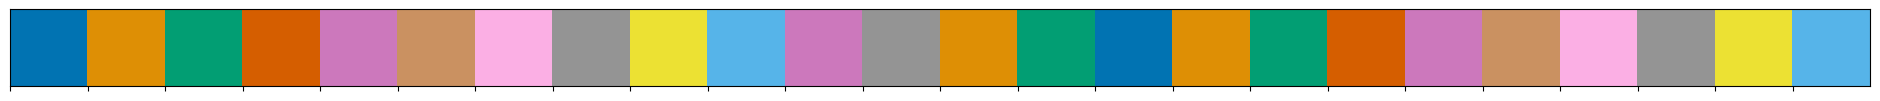

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the "colorblind" palette
pal = sns.color_palette("colorblind", 10)

# Create the cycle
cycle = np.vstack([pal[::], pal[4:5:], pal[7:8:], pal[1:3:], pal]) #[pal[1:6:],pal[::],pal[::],pal]

# Display the color palette
sns.palplot(cycle)
plt.show()

newcycle = cycle.copy()

In [ ]:
from matplotlib.ticker import PercentFormatter

In [ ]:
indices_to_plot = topic_ind_table4[::] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]

<ipython-input-29-545d2d46b654>:9: FutureWarning: The provided callable <function mean at 0x795ec2a293a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y_z = df.groupby('year')[z].agg(np.mean)


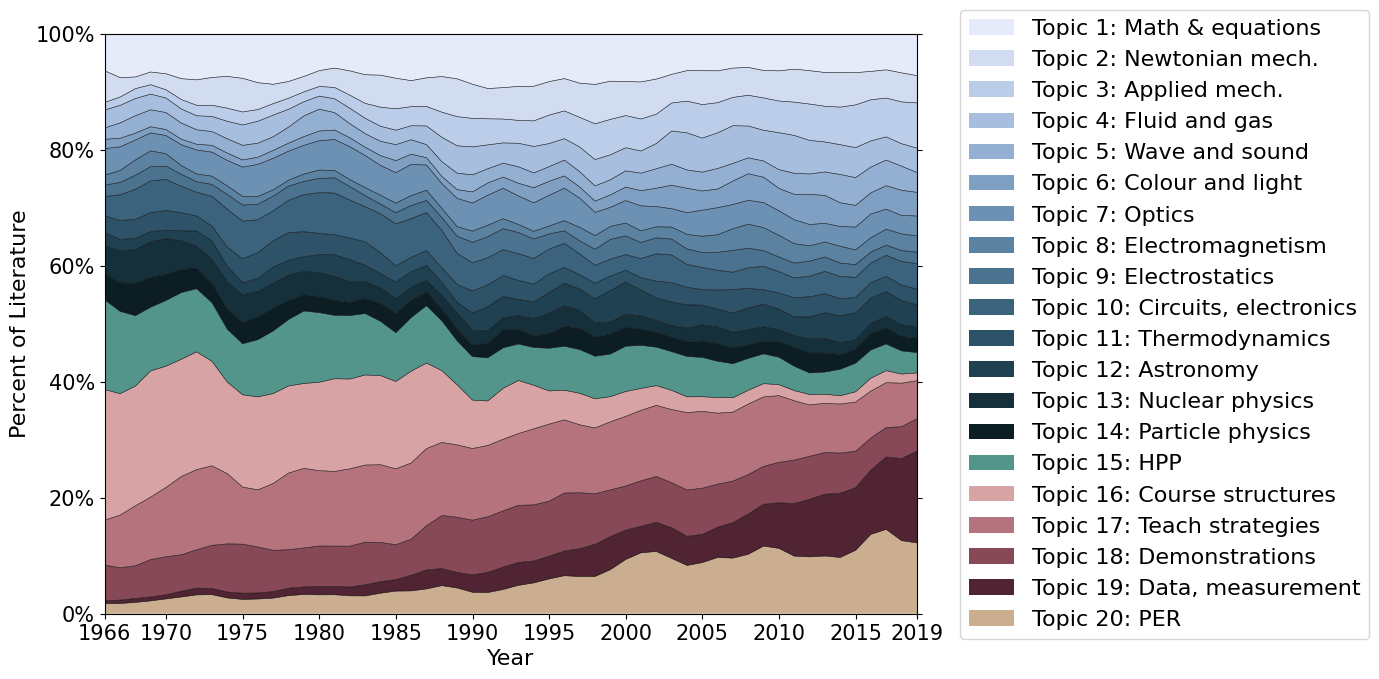

In [ ]:
#Swipe History and content
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years

indices_to_plot = topic_ind_table4[::] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]

y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.mean)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

#Normalize y to 100%
row_sums = y.sum(axis=0)
y = y / row_sums[np.newaxis,:]

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching
pal += sns.cubehelix_palette(dark=0.5, light=0.5, n_colors = 1, start = 2.2, rot = 0.1, reverse = True) #HPP
pal += sns.cubehelix_palette(dark=0.1, light=0.92, n_colors = 14, start = 2.55, rot = 0.1,reverse = True) #content


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,7));

# Stackplot without passing labels directly
#ax.stackplot(years, y, colors=pal,baseline='zero', alpha=1, labels='%s'%topic_keys[z])
ax.stackplot(years, y, colors=pal, baseline='zero', alpha=1, labels=[topic_keys[i] for i in indices_to_plot])


# Manually build the legend
_ = ax.legend([topic_keys_final[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys_final[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966, 2019]);
_ = ax.set_xticks([1966,1970,1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Percent of Literature", fontsize=16)

#Percent on y-axis
_ = ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
_ = ax.set_ylim([0,1]);
#_ = ax.set_yticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]);
#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure01.png', dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-30-d1b64da11b14>:6: FutureWarning: The provided callable <function sum at 0x795ec2a282c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  y_z = df.groupby('year')[z].agg(np.sum)


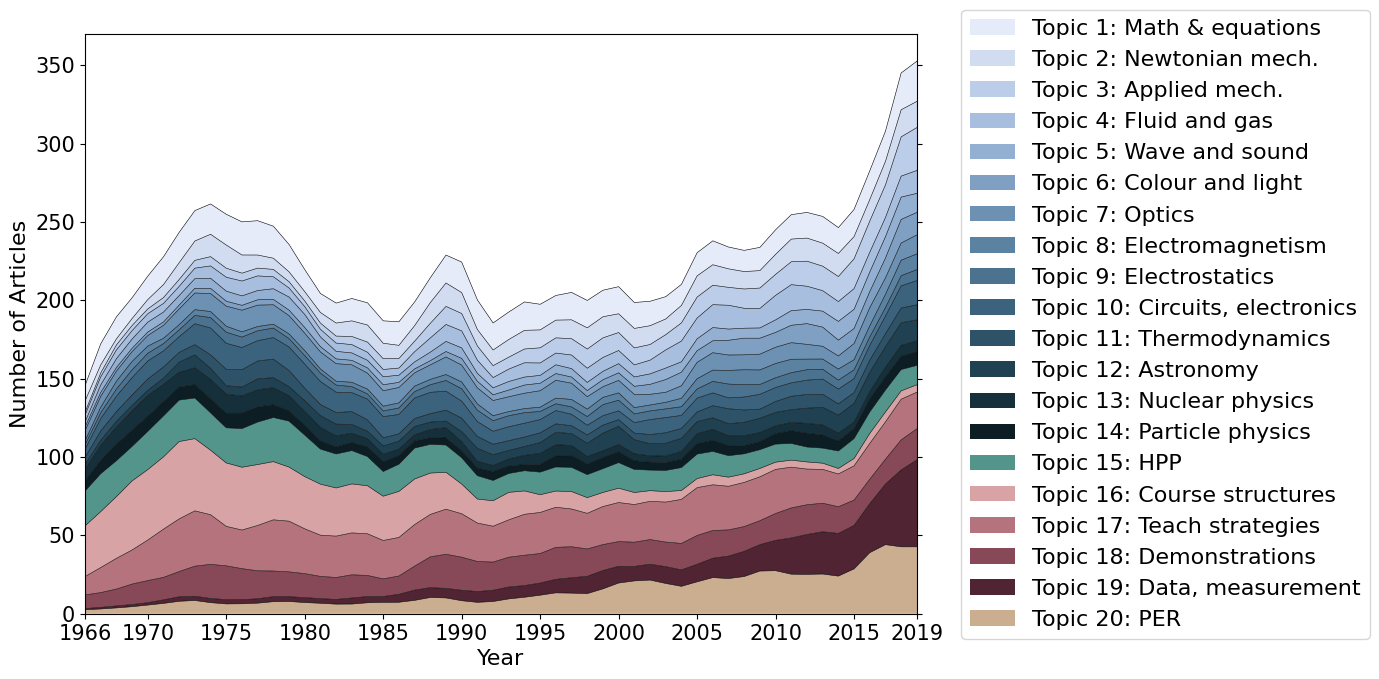

In [ ]:
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years
indices_to_plot = topic_ind_table4[::-1] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]
y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.sum)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching
pal += sns.cubehelix_palette(dark=0.5, light=0.5, n_colors = 1, start = 2.2, rot = 0.1, reverse = True) #HPP
pal += sns.cubehelix_palette(dark=0.1, light=0.92, n_colors = 14, start = 2.55, rot = 0.1,reverse = True) #content


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,7));

# Stackplot without passing labels directly
ax.stackplot(years, y, colors=pal, baseline='zero', alpha=1, labels=[topic_keys[i] for i in indices_to_plot])

# Manually build the legend
_ = ax.legend([topic_keys_final[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys_final[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966,2019]);
_ = ax.set_xticks([1966,1970,1975, 1980,1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Number of Articles", fontsize=16)

#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure02.png', dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-40-0a427f5a64a4>:6: FutureWarning: The provided callable <function mean at 0x795ec2a293a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y_z = df.groupby('year')[z].agg(np.mean)


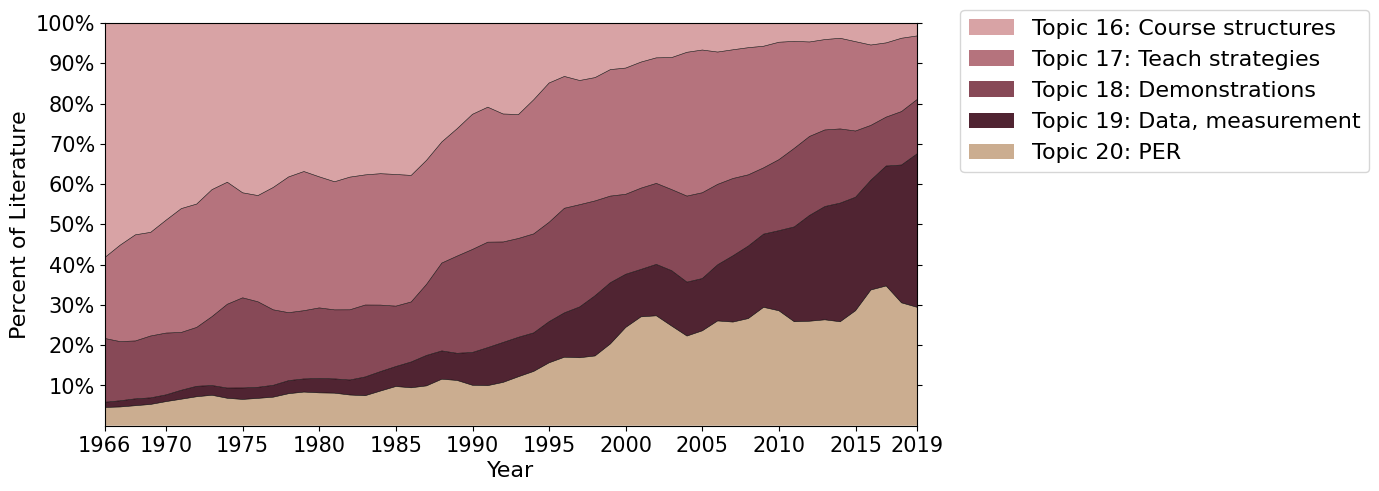

In [ ]:
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years
indices_to_plot = topic_ind_table4[::-1] + topic_ind_table3[::-1]
y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.mean)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

#Normalize y to 100%
row_sums = y.sum(axis=0)
y = y / row_sums[np.newaxis,:]

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching

# Create the figure and axis
#fig, ax = plt.subplots(figsize=(12,6));
fig, ax = plt.subplots(figsize=(14,5));

# Stackplot without passing labels directly
ax.stackplot(years, y, colors=pal,baseline='zero', alpha=1, labels='%s'%topic_keys[z])

# Manually build the legend
_ = ax.legend([topic_keys[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966,2019]);
_ = ax.set_xticks([1966,1970,1975, 1980,1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Percent of Literature", fontsize=16)

#Percent on y-axis
_ = ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
_ = ax.set_ylim([0,1]);
_ = ax.set_yticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]);
#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure04.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# prompt: crea df_PE selezionando le righe che hanno journal=PE da df

df_PE = df[df['journal'] == 'PE']
df_TPT = df[df['journal'] == 'TPT']

In [ ]:
# prompt: mostra le dimensioni di df_PE e df_TPT

print("Shape of df_PE:", df_PE.shape)
print("Shape of df_TPT:", df_TPT.shape)


Shape of df_PE: (5634, 25)
Shape of df_TPT: (7075, 25)


In [ ]:
df = df_PE

<ipython-input-45-e1634dccba54>:9: FutureWarning: The provided callable <function mean at 0x795ec2a293a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y_z = df.groupby('year')[z].agg(np.mean)


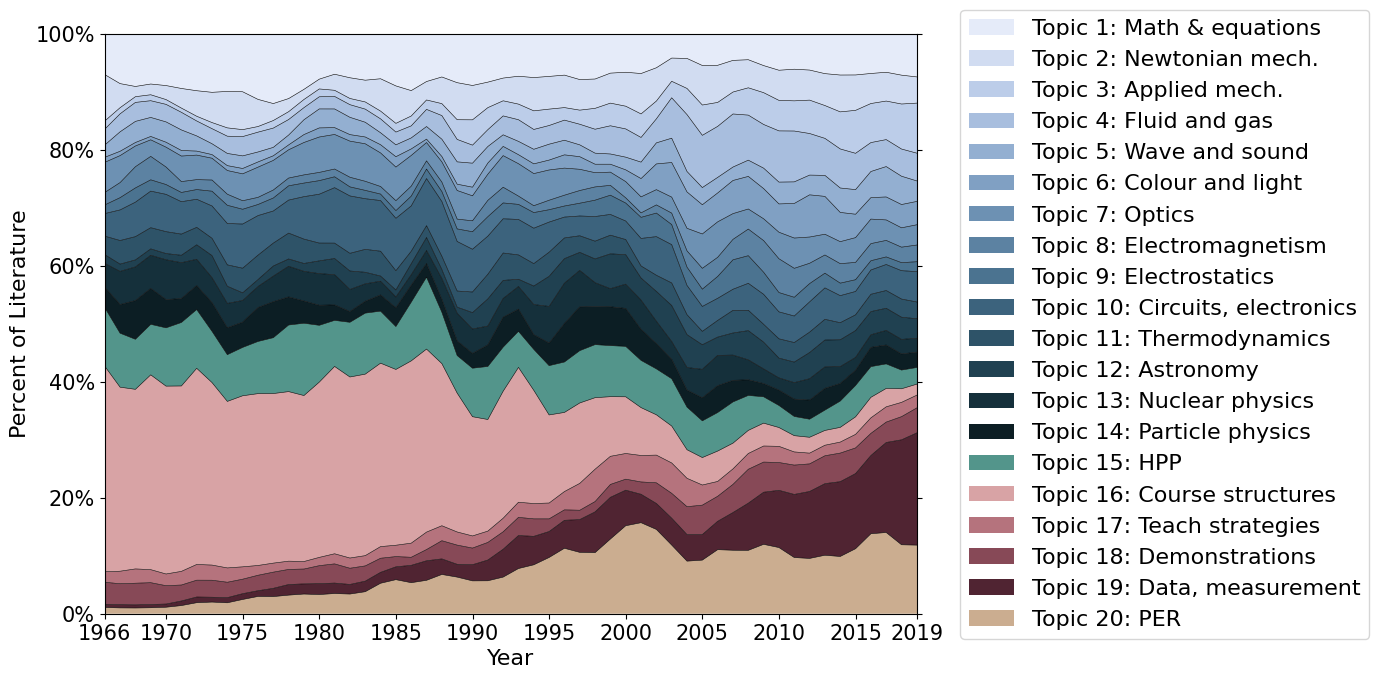

In [ ]:
#Swipe History and content
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years

indices_to_plot = topic_ind_table4[::] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]

y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.mean)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

#Normalize y to 100%
row_sums = y.sum(axis=0)
y = y / row_sums[np.newaxis,:]

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching
pal += sns.cubehelix_palette(dark=0.5, light=0.5, n_colors = 1, start = 2.2, rot = 0.1, reverse = True) #HPP
pal += sns.cubehelix_palette(dark=0.1, light=0.92, n_colors = 14, start = 2.55, rot = 0.1,reverse = True) #content


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,7));

# Stackplot without passing labels directly
#ax.stackplot(years, y, colors=pal,baseline='zero', alpha=1, labels='%s'%topic_keys[z])
ax.stackplot(years, y, colors=pal, baseline='zero', alpha=1, labels=[topic_keys[i] for i in indices_to_plot])


# Manually build the legend
_ = ax.legend([topic_keys_final[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys_final[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966, 2019]);
_ = ax.set_xticks([1966,1970,1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Percent of Literature", fontsize=16)

#Percent on y-axis
_ = ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
_ = ax.set_ylim([0,1]);
#_ = ax.set_yticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]);
#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure06.png', dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-46-b2d0d019b76a>:6: FutureWarning: The provided callable <function sum at 0x795ec2a282c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  y_z = df.groupby('year')[z].agg(np.sum)


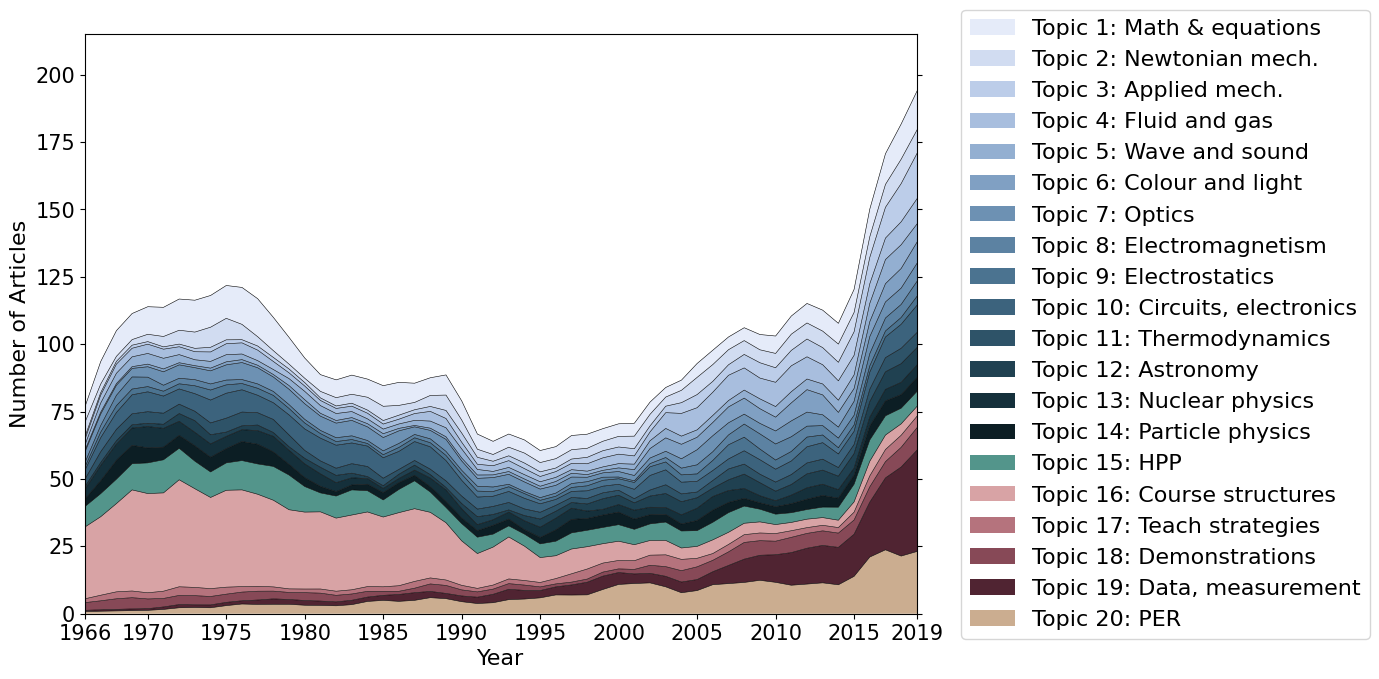

In [ ]:
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years
indices_to_plot = topic_ind_table4[::-1] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]
y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.sum)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching
pal += sns.cubehelix_palette(dark=0.5, light=0.5, n_colors = 1, start = 2.2, rot = 0.1, reverse = True) #HPP
pal += sns.cubehelix_palette(dark=0.1, light=0.92, n_colors = 14, start = 2.55, rot = 0.1,reverse = True) #content


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,7));

# Stackplot without passing labels directly
ax.stackplot(years, y, colors=pal, baseline='zero', alpha=1, labels=[topic_keys[i] for i in indices_to_plot])

# Manually build the legend
_ = ax.legend([topic_keys_final[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys_final[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966,2019]);
_ = ax.set_xticks([1966,1970,1975, 1980,1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Number of Articles", fontsize=16)

#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure08.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
df = df_TPT

<ipython-input-48-a7ae2c89e238>:9: FutureWarning: The provided callable <function mean at 0x795ec2a293a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y_z = df.groupby('year')[z].agg(np.mean)


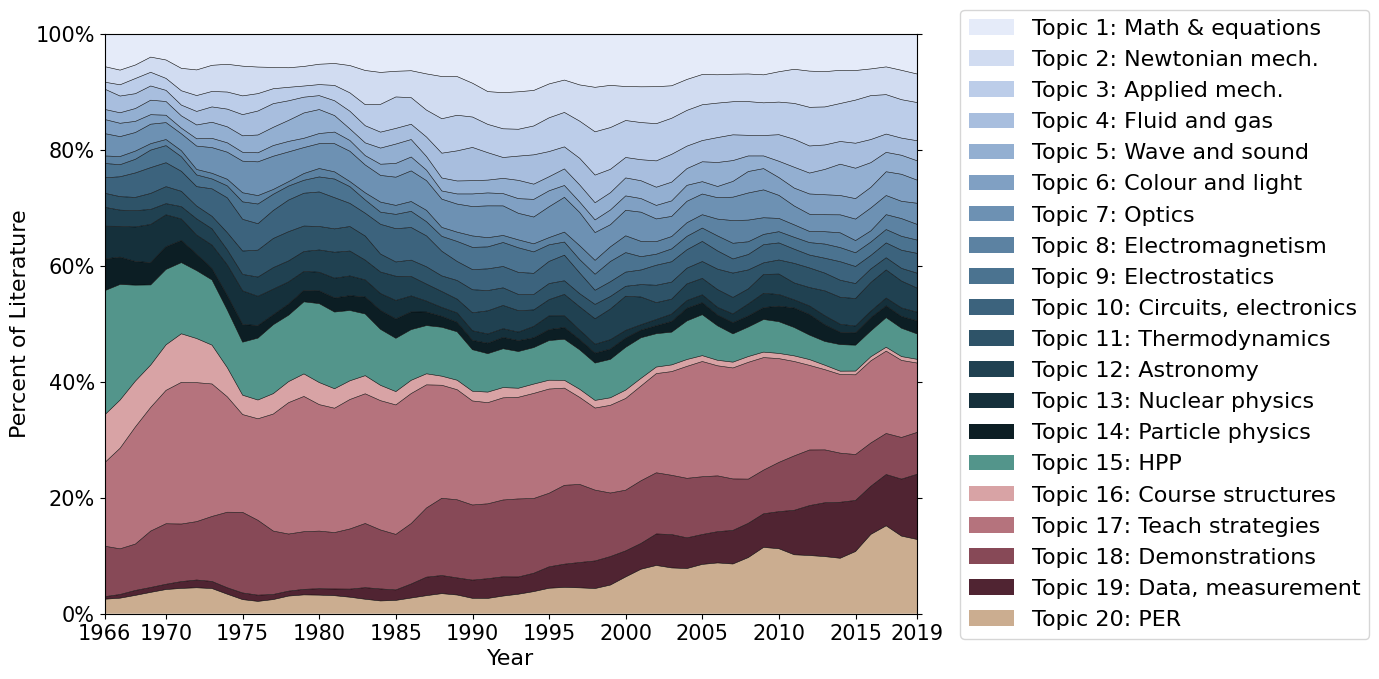

In [ ]:
#Swipe History and content
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years

indices_to_plot = topic_ind_table4[::] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]

y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.mean)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

#Normalize y to 100%
row_sums = y.sum(axis=0)
y = y / row_sums[np.newaxis,:]

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching
pal += sns.cubehelix_palette(dark=0.5, light=0.5, n_colors = 1, start = 2.2, rot = 0.1, reverse = True) #HPP
pal += sns.cubehelix_palette(dark=0.1, light=0.92, n_colors = 14, start = 2.55, rot = 0.1,reverse = True) #content


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,7));

# Stackplot without passing labels directly
#ax.stackplot(years, y, colors=pal,baseline='zero', alpha=1, labels='%s'%topic_keys[z])
ax.stackplot(years, y, colors=pal, baseline='zero', alpha=1, labels=[topic_keys[i] for i in indices_to_plot])


# Manually build the legend
_ = ax.legend([topic_keys_final[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys_final[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966, 2019]);
_ = ax.set_xticks([1966,1970,1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Percent of Literature", fontsize=16)

#Percent on y-axis
_ = ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
_ = ax.set_ylim([0,1]);
#_ = ax.set_yticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]);
#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure05.png', dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-49-c25055a751e1>:6: FutureWarning: The provided callable <function sum at 0x795ec2a282c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  y_z = df.groupby('year')[z].agg(np.sum)


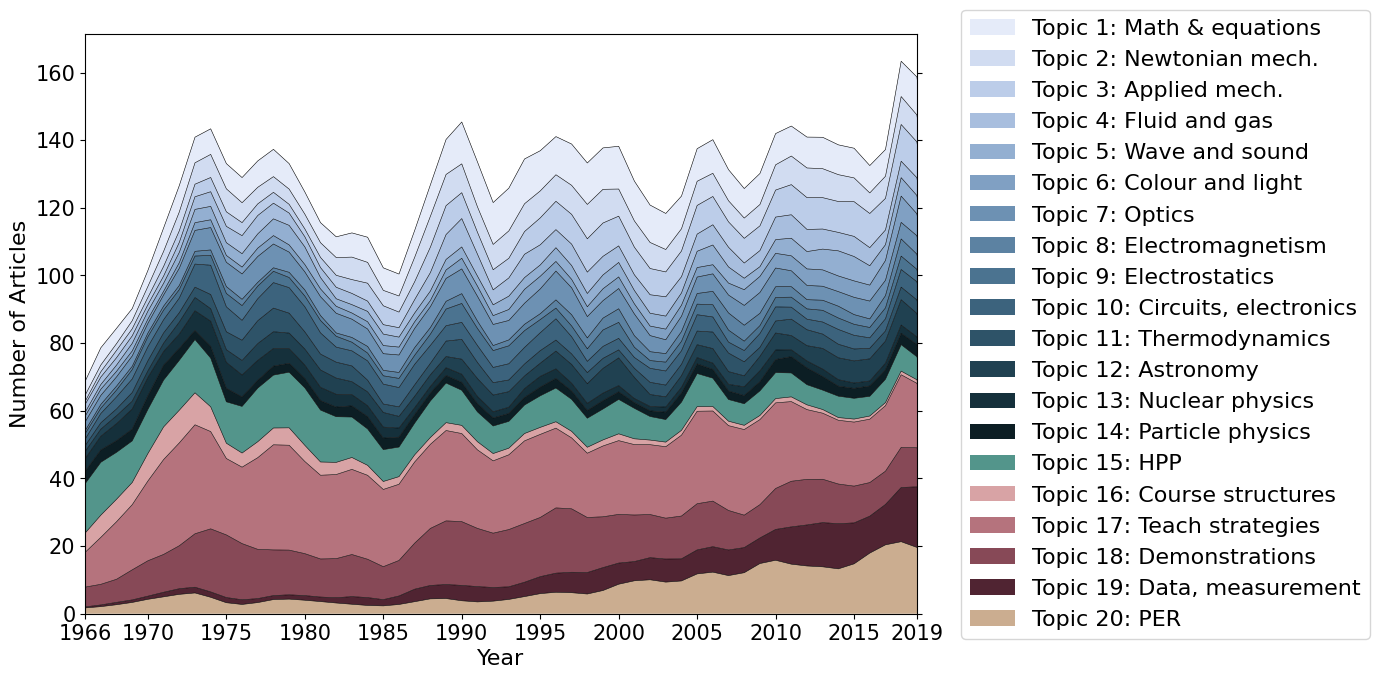

In [ ]:
#colourblind friendly colours
years = np.arange(1966, 2021)  # Years
indices_to_plot = topic_ind_table4[::-1] + topic_ind_table3[::-1] + topic_ind_table1[::-1] + topic_ind_table2[::-1]
y = np.zeros([len(indices_to_plot), len(years)])
for i,z in enumerate(indices_to_plot):
    y_z = df.groupby('year')[z].agg(np.sum)
    y_z = y_z.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    y[i,:] = y_z

pal = []
pal += sns.cubehelix_palette(dark=0.5, light=0.7, n_colors = 1, start = 1, rot = 0.1, reverse = True) #learning
pal += sns.cubehelix_palette(dark=0.2, light=0.7, n_colors = 4, start = 0.70, rot = 0.1, reverse = True) #teaching
pal += sns.cubehelix_palette(dark=0.5, light=0.5, n_colors = 1, start = 2.2, rot = 0.1, reverse = True) #HPP
pal += sns.cubehelix_palette(dark=0.1, light=0.92, n_colors = 14, start = 2.55, rot = 0.1,reverse = True) #content


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,7));

# Stackplot without passing labels directly
ax.stackplot(years, y, colors=pal, baseline='zero', alpha=1, labels=[topic_keys[i] for i in indices_to_plot])

# Manually build the legend
_ = ax.legend([topic_keys_final[i] for i in indices_to_plot], loc='best', bbox_to_anchor=(1.04, 1.06));
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles[::-1], [topic_keys_final[i] for i in reversed(indices_to_plot)], loc='best', bbox_to_anchor=(1.04, 1.06), fontsize= "16" ); #'xx-large'
_ = ax.set_xlim([1966,2019]);
_ = ax.set_xticks([1966,1970,1975, 1980,1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019]);

# Add titles and labels
#ax.set_title("Physics Education and The Physics Teacher journals", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Number of Articles", fontsize=16)

#Set Ticks
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticks_position('both')
#ax.tick_params(axis='y', which='both', labelright ='off')

for i,z in enumerate(indices_to_plot):
    _ = ax.plot(years, np.sum(y[:i+1,:],axis=0), color='k', linewidth=0.4);

# Layout adjustment
# Layout adjustment
plt.tight_layout()
plt.savefig(directory_name + 'Figure07.png', dpi=600, bbox_inches='tight')
plt.show()

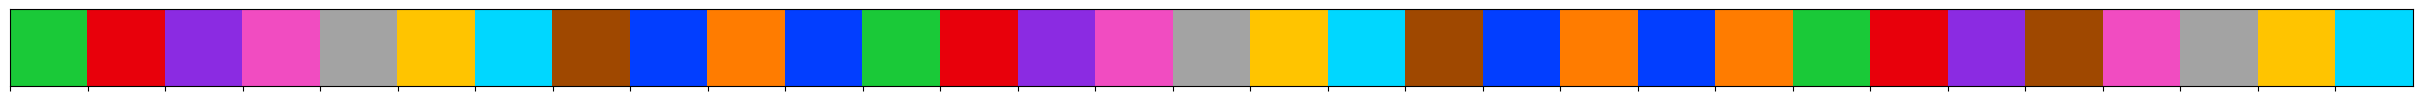

In [ ]:
pal2 = []
pal2= sns.color_palette("bright")

cycle2 = np.vstack([pal2[2:5:], pal2[6:7:], pal2[7::], pal2[5:6:], pal2[:2:], pal2[0:1:], pal2[2:5:], pal2[6:7:], pal2[7::], pal2[5:6:], pal2[:2:], pal2])

# Display the color palette
sns.palplot(cycle2)
plt.show()

newcycle2 = cycle2.copy()

<ipython-input-36-fafa143391ef>:8: FutureWarning: The provided callable <function sum at 0x795ec2a282c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  y = df.groupby('year')[z].agg(np.sum);


<Figure size 1200x700 with 0 Axes>

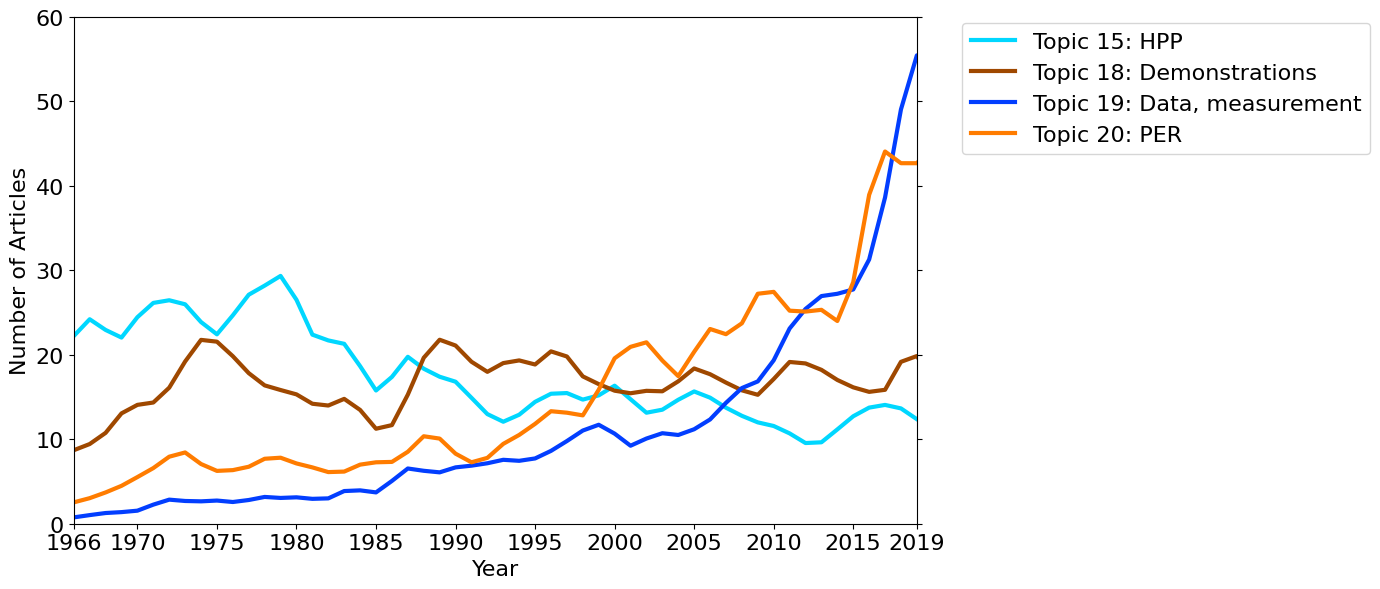

In [ ]:
#Plot prevalence traces
fig = plt.figure(figsize=(12,7));
topic_ind_waves_up = [4, 3, 13, 14]

ymax = 0
fig, ax = plt.subplots(figsize=(14,6))
for i,z in enumerate(topic_ind_waves_up):
    y = df.groupby('year')[z].agg(np.sum);
    y = y.rolling(3, min_periods=1, center=True, win_type='triang').mean();
    line, = ax.plot(y, color=newcycle2[i+6], linewidth=3, label='%s'%topic_keys[z])
    ymax = np.max([ymax, np.max(y)])
_ = ax.legend(loc='upper left', fontsize= '16', bbox_to_anchor=(1.04, 1.01))
_ = ax.set_xlim([1966,2019]);
_ = ax.set_xticks([1966,1970, 1975, 1980,1985, 1990, 1995, 2000,2005, 2010, 2015, 2019])
#_ = ax.set_ylim([0,np.ceil(ymax*100/5)*5/100]);
_ = ax.set_ylim([0, 60]); # Fix y-axis at 25%

ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Number of Articles", fontsize=16)
#Set Ticks
ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_ticks_position('both')

plt.tight_layout()
plt.savefig(directory_name + 'Figure03.png', dpi=600, bbox_inches='tight')
plt.show()